In [1]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt

# Import file from parent directory
import sys
sys.path.append('../')
import utils

random.seed(0)

val_size = .2
test_size = .3

# Data loading

In [2]:
data_dir = "../../data/cancer_type"

In [3]:
df_data = pd.read_csv(
    os.path.join(data_dir, "tcga_reports_cancer_type.csv"),
    sep=',',
    header=0
)

In [4]:
df_data.shape

(9523, 4)

In [5]:
df_data.head()

,patient_id,text,cancer_type,cancer_type_name
0,TCGA-BP-5195,Date of Recelpt: Clinical Diagnosis & History:...,KIRC,Kidney renal clear cell carcinoma
1,TCGA-D7-8573,"Material: 1) Material: stomach, Method of coll...",STAD,Stomach adenocarcinoma
2,TCGA-EI-7004,page 1 / 1. copy No. 3. Examination: Histopath...,READ,Rectum adenocarcinoma
3,TCGA-EB-A82B,Patient ID: Gross Description: A mass is locat...,SKCM,Skin Cutaneous Melanoma
4,TCGA-A6-3808,SPECIMEN. Right colon. CLINICAL NOTES. PRE-OP ...,COAD,Colon adenocarcinoma


In [6]:
df_data.index = df_data["patient_id"].values

# Data split

In [7]:
arr_pat_id = df_data["patient_id"].values.tolist()

In [8]:
n_test_size = round(test_size * df_data.shape[0])

In [9]:
n_val_size = round(val_size * df_data.shape[0])

## Test split

In [10]:
arr_test_pat_id = random.sample(arr_pat_id, n_test_size)

In [11]:
df_test = df_data.loc[arr_test_pat_id].copy()

In [12]:
df_test.shape

(2857, 4)

In [13]:
arr_train_val_pat_id = [
    pat_id for pat_id in arr_pat_id
    if pat_id not in arr_test_pat_id
]

In [14]:
df_train_val = df_data.loc[arr_train_val_pat_id].copy()

## Val split

In [15]:
arr_val_pat_id = random.sample(arr_train_val_pat_id, n_val_size)

In [16]:
df_val = df_data.loc[arr_val_pat_id].copy()

In [17]:
df_val.shape

(1905, 4)

In [18]:
arr_train_pat_id = [
    pat_id for pat_id in arr_train_val_pat_id
    if pat_id not in arr_val_pat_id
]

In [19]:
df_train = df_data.loc[arr_train_pat_id].copy()

In [20]:
df_train.shape

(4761, 4)

In [21]:
# Sanity check
assert df_train.shape[0] + df_val.shape[0] + df_test.shape[0] == df_data.shape[0]
assert len(set(df_train["patient_id"].values).intersection(set(df_val["patient_id"].values))) == 0
assert len(set(df_train["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0
assert len(set(df_val["patient_id"].values).intersection(set(df_test["patient_id"].values))) == 0

We ensure that the distribution of the labels in the three subsets is similar to the label distribution of the entire set:

In [22]:
utils.value_dist({
    "all": df_data["cancer_type"],
    "train": df_train["cancer_type"],
    "val": df_val["cancer_type"],
    "test": df_test["cancer_type"]
})

,all,train,val,test
BRCA,1034 (10.9%),532 (11.2%),232 (12.2%),270 (9.5%)
UCEC,546 (5.7%),278 (5.8%),111 (5.8%),157 (5.5%)
KIRC,525 (5.5%),255 (5.4%),111 (5.8%),159 (5.6%)
HNSC,520 (5.5%),254 (5.3%),118 (6.2%),148 (5.2%)
LUAD,488 (5.1%),230 (4.8%),104 (5.5%),154 (5.4%)
THCA,487 (5.1%),237 (5.0%),93 (4.9%),157 (5.5%)
LGG,469 (4.9%),230 (4.8%),103 (5.4%),136 (4.8%)
LUSC,468 (4.9%),232 (4.9%),97 (5.1%),139 (4.9%)
PRAD,446 (4.7%),225 (4.7%),87 (4.6%),134 (4.7%)
COAD,418 (4.4%),213 (4.5%),85 (4.5%),120 (4.2%)


We present the same information in a graphical way:

In [23]:
df_label_dist = pd.DataFrame({
    "all": df_data["cancer_type"].value_counts(normalize=True).to_dict(),
    "train": df_train["cancer_type"].value_counts(normalize=True).to_dict(),
    "val": df_val["cancer_type"].value_counts(normalize=True).to_dict(),
    "test": df_test["cancer_type"].value_counts(normalize=True).to_dict()
})

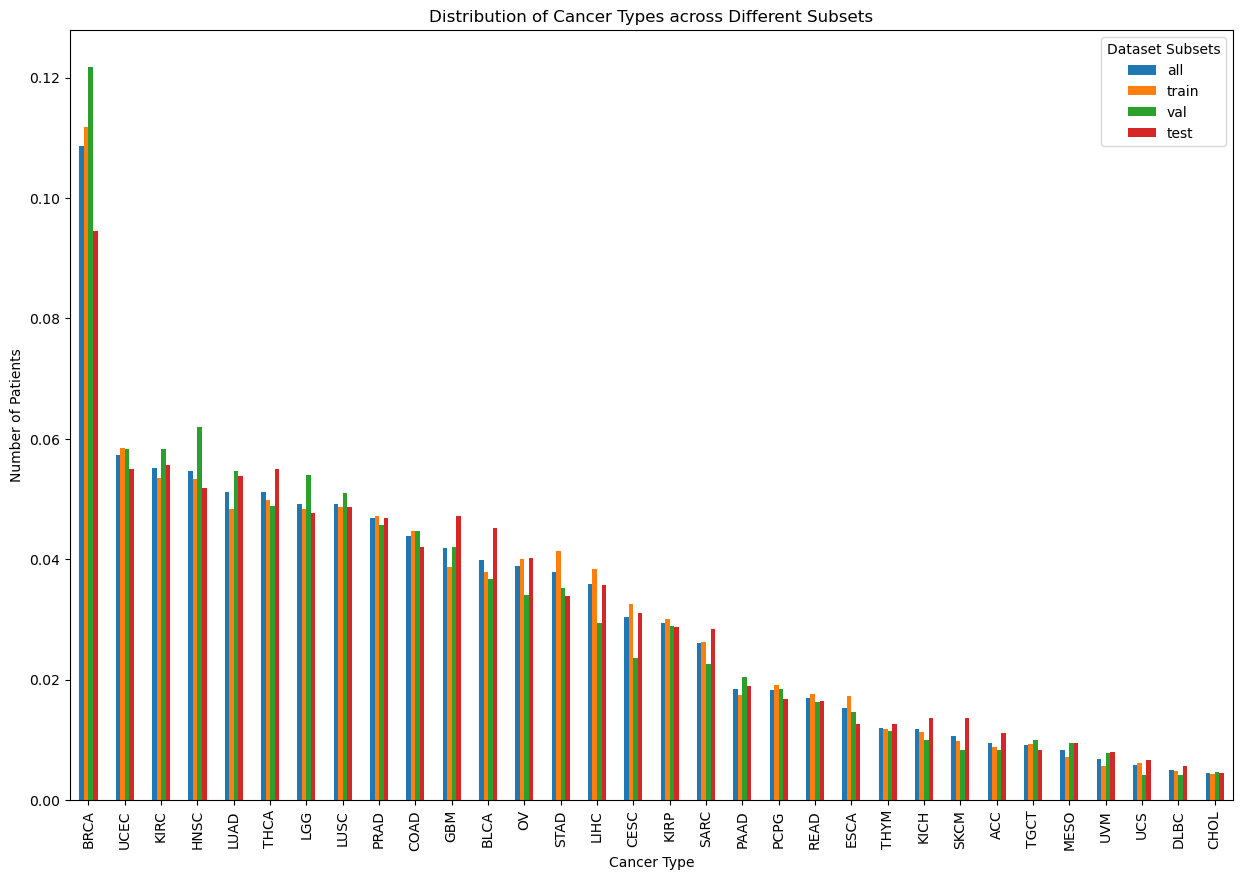

In [24]:
fig, ax = plt.subplots(figsize=(15, 10))
df_label_dist.plot(kind='bar', ax=ax)
ax.set_title('Distribution of Cancer Types across Different Subsets')
ax.set_xlabel('Cancer Type')
ax.set_ylabel('Number of Patients')
ax.legend(title="Dataset Subsets")
plt.show()

# Save

We finally save the training, validation and test subsets:

In [25]:
df_train.to_csv(
    os.path.join(data_dir, "train_tcga_reports_cancer_type.csv"),
    sep=',',
    index=False,
    header=True
)

In [26]:
df_val.to_csv(
    os.path.join(data_dir, "val_tcga_reports_cancer_type.csv"),
    sep=',',
    index=False,
    header=True
)

In [27]:
df_test.to_csv(
    os.path.join(data_dir, "test_tcga_reports_cancer_type.csv"),
    sep=',',
    index=False,
    header=True
)